<a href="https://colab.research.google.com/github/w3bit0/teste3/blob/main/lppls_for_minute_bars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install lppls

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.8/48.8 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.5/283.5 kB 8.0 MB/s eta 0:00:00


# Yeni Bölüm

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from lppls import lppls, data_loader

In [ ]:
df = pd.read_csv("https://github.com/Boulder-Investment-Technologies/lppls/files/9987165/to_csv_out.csv", index_col=0, parse_dates=True)
print(len(df))
df_trunc = df.tail(200)
print(len(df_trunc))

52560
200


In [ ]:
df_trunc

,Price
2022-11-08 14:40:00,19409.487241
2022-11-08 14:50:00,19475.739602
2022-11-08 15:00:00,19479.192595
2022-11-08 15:10:00,19476.921520
2022-11-08 15:20:00,19415.665587
...,...
2022-11-09 23:10:00,15864.503863
2022-11-09 23:20:00,15764.996681
2022-11-09 23:30:00,15710.393787
2022-11-09 23:40:00,15790.153465


<Axes: >

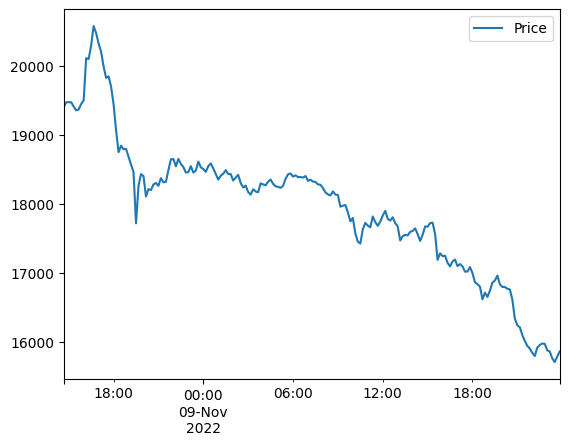

In [ ]:
df_trunc.plot()

In [ ]:
len(df_trunc)

200

In [ ]:
t = np.linspace(0, len(df_trunc), len(df_trunc))
t

array([  0.        ,   1.00502513,   2.01005025,   3.01507538,
         4.0201005 ,   5.02512563,   6.03015075,   7.03517588,
         8.04020101,   9.04522613,  10.05025126,  11.05527638,
        12.06030151,  13.06532663,  14.07035176,  15.07537688,
        16.08040201,  17.08542714,  18.09045226,  19.09547739,
        20.10050251,  21.10552764,  22.11055276,  23.11557789,
        24.12060302,  25.12562814,  26.13065327,  27.13567839,
        28.14070352,  29.14572864,  30.15075377,  31.15577889,
        32.16080402,  33.16582915,  34.17085427,  35.1758794 ,
        36.18090452,  37.18592965,  38.19095477,  39.1959799 ,
        40.20100503,  41.20603015,  42.21105528,  43.2160804 ,
        44.22110553,  45.22613065,  46.23115578,  47.2361809 ,
        48.24120603,  49.24623116,  50.25125628,  51.25628141,
        52.26130653,  53.26633166,  54.27135678,  55.27638191,
        56.28140704,  57.28643216,  58.29145729,  59.29648241,
        60.30150754,  61.30653266,  62.31155779,  63.31

In [ ]:
# convert time to linearly spaced
t = np.linspace(0, len(df_trunc), len(df_trunc))

# create list of observation data
price = np.log(df_trunc['Price'].values)

# create observations array (expected format for LPPLS observations)
observations = np.array([t, price])

# set the max number for searches to perform before giving-up
# the literature suggests 25
MAX_SEARCHES = 25

# instantiate a new LPPLS model with the Nasdaq Dot-com bubble dataset
lppls_model = lppls.LPPLS(observations=observations)


In [ ]:
res = lppls_model.mp_compute_nested_fits(
    workers=1,
    window_size=120,
    smallest_window_size=30,
    outer_increment=1,
    inner_increment=5,
    max_searches=25,
    # filter_conditions_config={} # not implemented in 0.6.x
)

  0%|          | 0/81 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/lppls/lppls.py:617: RuntimeWarning: invalid value encountered in log
  return (w / (2.0 * np.pi)) * np.log((tc - t1) / (tc - t2))
/usr/local/lib/python3.10/dist-packages/lppls/lppls.py:617: RuntimeWarning: invalid value encountered in log
  return (w / (2.0 * np.pi)) * np.log((tc - t1) / (tc - t2))
100%|██████████| 81/81 [00:41<00:00,  1.93it/s]


In [ ]:
res_df

,time,price,pos_conf,neg_conf,_fits
0,119.597990,9.765858,0.0,0.000000,"[{'tc': 88.46786749132893, 'm': 2.511713221929..."
1,120.603015,9.777727,0.0,0.000000,"[{'tc': 88.52840440174475, 'm': 2.621381521045..."
2,121.608040,9.782948,0.0,0.000000,"[{'tc': 97.20634605725306, 'm': 2.939699773895..."
3,122.613065,9.780719,0.0,0.000000,"[{'tc': 97.3898072530053, 'm': 3.1133570187486..."
4,123.618090,9.779288,0.0,0.000000,"[{'tc': 0, 'm': 0, 'w': 0, 'a': 0, 'b': 0, 'c'..."
...,...,...,...,...,...
76,195.979899,9.671839,0.0,0.500000,"[{'tc': 201.77998509772505, 'm': 0.26803696252..."
77,196.984925,9.665547,0.0,0.333333,"[{'tc': 203.10218171081192, 'm': 0.26715548748..."
78,197.989950,9.662078,0.0,0.166667,"[{'tc': 191.59373791294217, 'm': 0.39620924793..."
79,198.994975,9.667142,0.0,0.000000,"[{'tc': 234.66141971579765, 'm': -0.4856177238..."


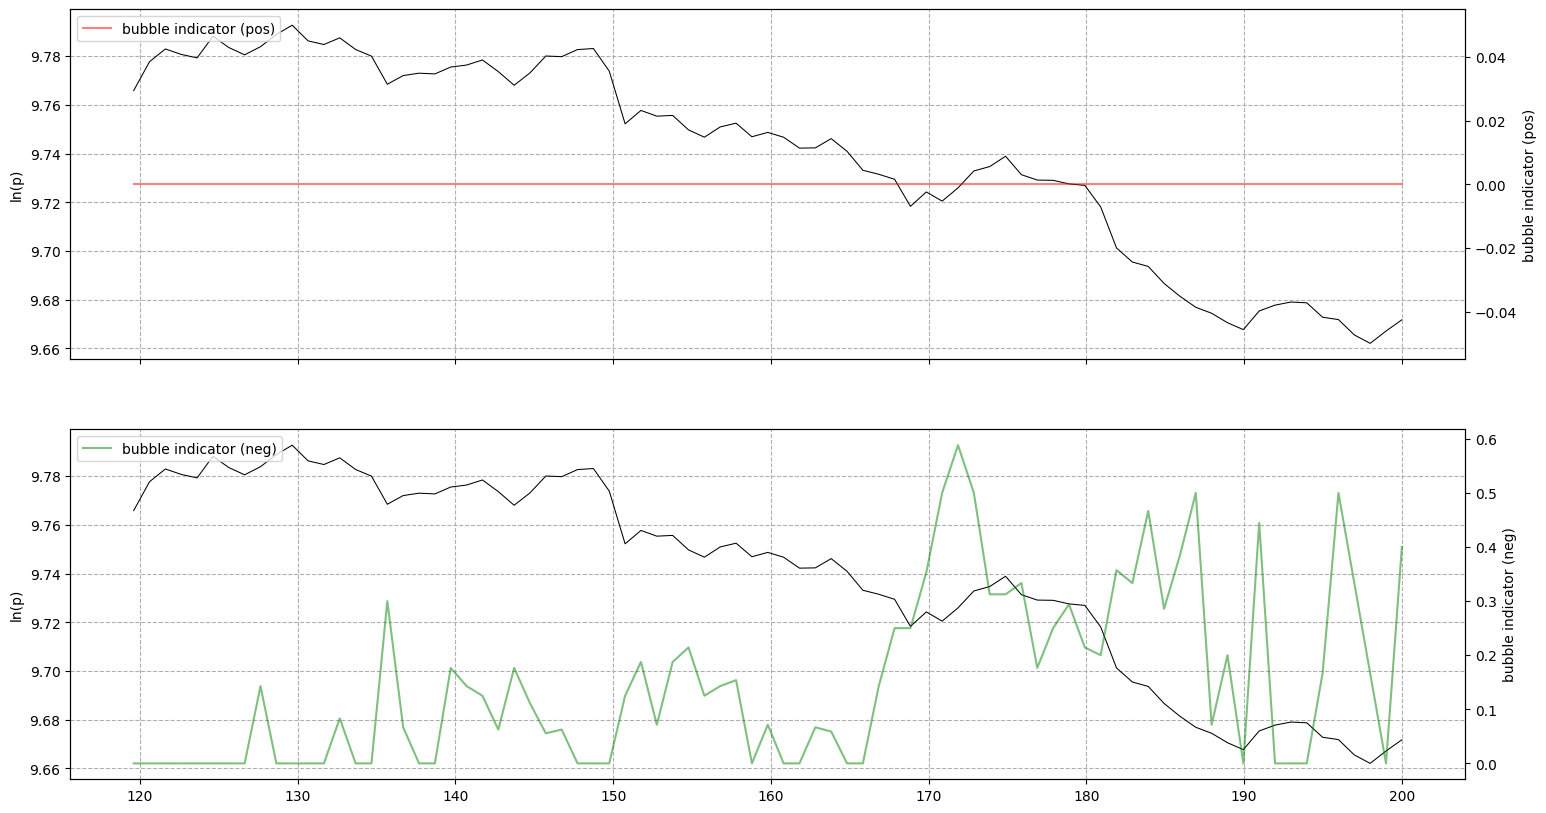

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(18, 10))

# plot pos bubbles
ax1_0 = ax1.twinx()
ax1.plot(res_df['time'], res_df['price'], color='black', linewidth=0.75)
# ax1_0.plot(compatible_date, pos_lst, label='pos bubbles', color='gray', alpha=0.5)
ax1_0.plot(res_df['time'], res_df['pos_conf'], label='bubble indicator (pos)', color='red', alpha=0.5)

# plot neg bubbles
ax2_0 = ax2.twinx()
ax2.plot(res_df['time'], res_df['price'], color='black', linewidth=0.75)
# ax2_0.plot(compatible_date, neg_lst, label='neg bubbles', color='gray', alpha=0.5)
ax2_0.plot(res_df['time'], res_df['neg_conf'], label='bubble indicator (neg)', color='green', alpha=0.5)

# set grids
ax1.grid(which='major', axis='both', linestyle='--')
ax2.grid(which='major', axis='both', linestyle='--')

# set labels
ax1.set_ylabel('ln(p)')
ax2.set_ylabel('ln(p)')

ax1_0.set_ylabel('bubble indicator (pos)')
ax2_0.set_ylabel('bubble indicator (neg)')

ax1_0.legend(loc=2)
ax2_0.legend(loc=2)

plt.xticks(rotation=45)
plt.show()